#MScFE 660 RISK MANAGEMENT
##Group Work Project # 1


###Step 3
Identify, import, structure, and graph macroeconomic, microeconomic, and geopolitical
variables that affect the price of oil globally. Each person is assigned one group of data.

A: Macroeconomic / geopolitical specialist

In [ ]:
pip install fredapi

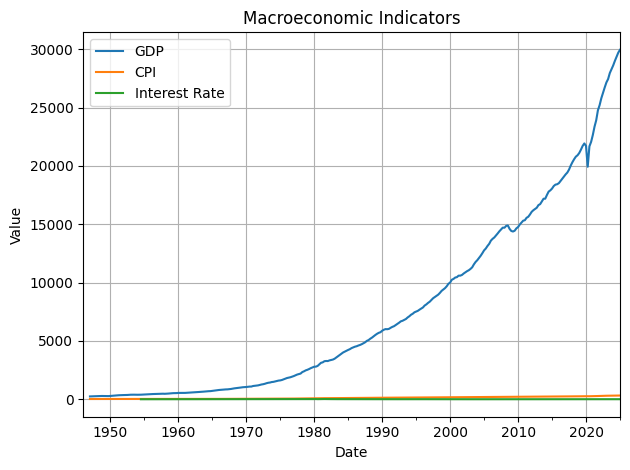

In [ ]:
#student A
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred
import os

fred = Fred(api_key="6d5e2a87667c268c32814e69a242048a")

data_series = {
    "GDP": "GDP",                # U.S. GDP
    "CPI": "CPIAUCSL",           # U.S. CPI
    "Interest Rate": "FEDFUNDS" # Fed Funds Rate
}

# Fetch data
macro_df = pd.DataFrame()
for label, code in data_series.items():
    macro_df[label] = fred.get_series(code)

# Save to CSV
macro_df.to_csv("macro_data.csv")

# Plot
macro_df.plot(title="Macroeconomic Indicators")
plt.xlabel("Date")
plt.ylabel("Value")
plt.grid()
plt.tight_layout()
plt.savefig("macro_plot.png")
plt.show()


In [ ]:
macro_df.head()

,GDP,CPI,Interest Rate
1946-01-01,NaN,NaN,NaN
1946-04-01,NaN,NaN,NaN
1946-07-01,NaN,NaN,NaN
1946-10-01,NaN,NaN,NaN
1947-01-01,243.164,21.48,NaN


B: Microeconomic specialist

In [ ]:
#student B
import pandas as pd
import matplotlib.pyplot as plt
import requests

# Example: U.S. refinery input data from EIA (requires API key)
api_key = "MM9N71UVCm7kAkJWcpgS9uupY9kaAhdAChMDbk9Q"
series_id = "PET.WCRRIUS2.W"  # Weekly crude oil refinery input

url = f"http://api.eia.gov/v2/seriesid/PET.RWTC.D?api_key={api_key}"
response = requests.get(url).json()
frequency = response['response']['frequency']
data = response['response']['data']

In [ ]:
print(frequency)

daily


In [ ]:
data[0]

{'period': '2025-07-07',
 'duoarea': 'YCUOK',
 'area-name': 'NA',
 'product': 'EPCWTI',
 'product-name': 'WTI Crude Oil',
 'process': 'PF4',
 'process-name': 'Spot Price FOB',
 'series': 'RWTC',
 'series-description': 'Cushing, OK WTI Spot Price FOB (Dollars per Barrel)',
 'value': 69.16,
 'units': '$/BBL'}

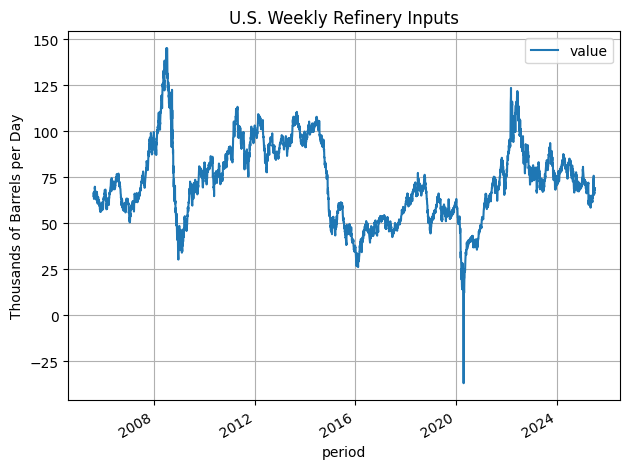

In [ ]:
raw_data = response['response']['data']
micro_df = pd.DataFrame(raw_data, columns=['period', 'value'])

micro_df['period'] = pd.to_datetime(micro_df['period'])
micro_df.set_index('period', inplace=True)
micro_df = micro_df.sort_index()

# Save and plot
micro_df.to_csv("micro_data.csv")
micro_df.plot(title="U.S. Weekly Refinery Inputs")
plt.ylabel("Thousands of Barrels per Day")
plt.grid()
plt.tight_layout()
plt.savefig("micro_plot.png")
plt.show()


In [ ]:
print(micro_df)

            value
period           
2005-08-10  64.80
2005-08-11  65.67
2005-08-12  66.71
2005-08-15  66.21
2005-08-16  66.11
...           ...
2025-06-30  66.30
2025-07-01  66.64
2025-07-02  68.66
2025-07-03  68.13
2025-07-07  69.16

[5000 rows x 1 columns]


C: Financial specialist

/tmp/ipython-input-9-3030642666.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  fin_df = yf.download(tickers, start="2020-01-01", end="2025-01-01")['Close']
[*********************100%***********************]  5 of 5 completed


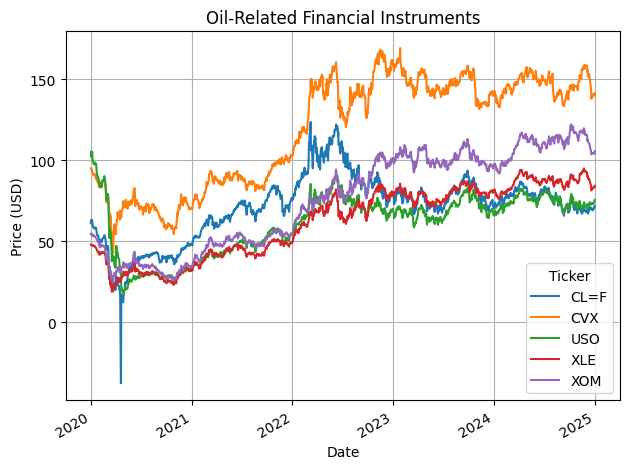

In [ ]:
#student C
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define tickers
tickers = ['CL=F', 'USO', 'XLE', 'XOM', 'CVX']  # Crude oil, oil ETF, energy ETF, Exxon, Chevron

# Download data
fin_df = yf.download(tickers, start="2020-01-01", end="2025-01-01")['Close']

# Save and plot
fin_df.to_csv("financial_data.csv")
fin_df.plot(title="Oil-Related Financial Instruments")
plt.ylabel("Price (USD)")
plt.grid()
plt.tight_layout()
plt.savefig("financial_plot.png")
plt.show()


In [ ]:
fin_df.head()

Ticker,CL=F,CVX,USO,XLE,XOM
Date,,,,,
2020-01-02,61.180000,95.001541,102.480003,47.822815,54.634769
2020-01-03,63.049999,94.672958,105.440002,47.680721,54.195553
2020-01-06,63.270000,94.352196,105.279999,48.051743,54.611671
2020-01-07,62.700001,93.147369,105.040001,47.925438,54.164726
2020-01-08,59.610001,92.083359,101.279999,47.136024,53.347900


### Step 4

As a group, the team writes a dictionary of the data used and a table showing the data,
frequency, source, start date, end date, and other relevant fields.

| Data | Frequency | Source | Start Date | End Date |
| --- | --- | --- | --- | ---|
| US GDP | quarterly | US FRED | 1947-01-01 | 2025-01-01 |
| US Consumer Price Index | Quarterly | US FRED | 1947-01-01 | 2025-01-01 |
| US Federal Funds Rate | Quarterly | US FRED | 1954-07-01 | 2025-01-01 |
| WTI crude oil spot prices | Daily | US EIA | 2005-08-04 | 2025-06-30 |
| Cruel Oil Futures | Daily | yfinance | 2020-01-02 | 2024-12-31 |
| Chevron Stock | Daily | yfinance | 2020-01-02 | 2024-12-31 |
| US Oil Fund ETF | Daily | yfinance |  2020-01-02 | 2024-12-31 |
| Energy Select Sector SPDR ETF | Daily | yfiannce | 2020-01-02 | 2024-12-31 |
| ExxonMobil Stock | Daily | yfinance | 2020-01-02 | 2024-12-31 |

### Step 5

Clean the data. Each person carefully reads Section 4.1 of the paper. Each person is
responsible for one part of cleaning the data. Student A will do their part on ALL the
data: macroeconomic, microeconomic, and geopolitical. Likewise, Student B will do
their part on ALL the data. Likewise, Student C will do their part on all the data. This
gives each person a chance to see all the data that was collected.

a. Student A focuses on the “extreme outlier” part of cleaning. That is, they will
identify values that are extreme compared to the rest of the data.

In [ ]:
import pandas as pd
from scipy.stats import zscore

def mark_outliers(df, n_sigma=3):
    """
    Marks outliers using the Z-score method on percentage returns.
    Adds {column}_outlier columns to flag where abs(Z) > n_sigma.

    Parameters:
        df (pd.DataFrame): Time-series DataFrame with price or value columns.
        n_sigma (float): Z-score threshold to classify outliers.

    Returns:
        pd.DataFrame: Original DataFrame with additional boolean {col}_outlier columns.
    """
    df_out = df.copy()

    # Calculate daily percentage returns
    returns = df.pct_change()

    # Compute Z-scores for returns
    z_scores = returns.apply(zscore, nan_policy='omit')

    # Create outlier flags
    for col in df.columns:
        outlier_col = f"{col}_outlier"

        # Create an aligned Series of NaNs
        outlier_flags = pd.Series(index=df.index, dtype='boolean')

        # Fill in only the rows where returns are not NaN
        outlier_flags.loc[returns[col].dropna().index] = z_scores[col].abs() > n_sigma

        # Attach to output DataFrame
        df_out[outlier_col] = outlier_flags

    return df_out


In [ ]:
macro_df_outliers = mark_outliers(macro_df)

In [ ]:
macro_df_outliers[macro_df_outliers['Interest Rate_outlier']]

,GDP,CPI,Interest Rate,GDP_outlier,CPI_outlier,Interest Rate_outlier
1958-10-01,499.555,28.910,1.80,False,False,True
2016-01-01,18525.933,237.652,0.34,False,False,True
2022-04-01,25805.791,288.582,0.33,False,False,True
2022-07-01,26272.011,294.940,1.68,False,False,True


In [ ]:
# Save Interest Rate outliers from macro_df_outliers to a CSV
interest_rate_outliers = macro_df_outliers[macro_df_outliers['Interest Rate_outlier']]
macro_df_outliers.to_csv("macro_df_outliers.csv")


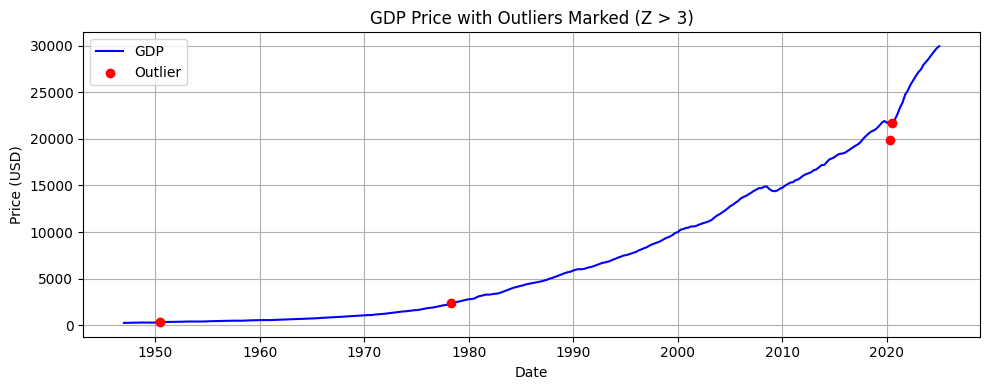

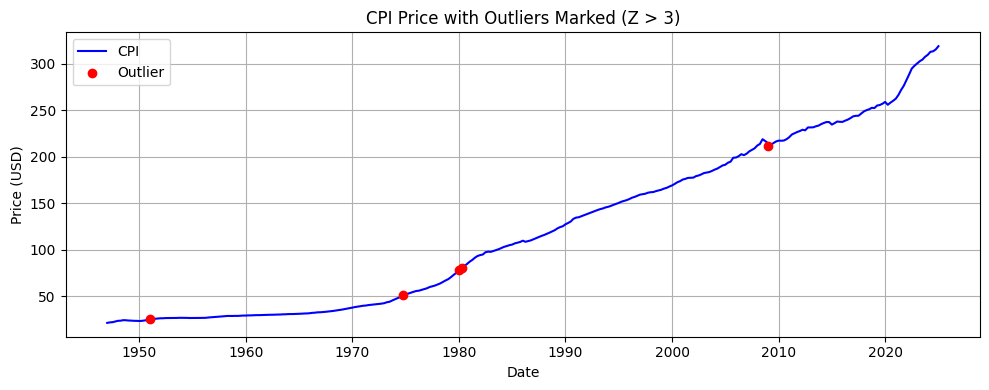

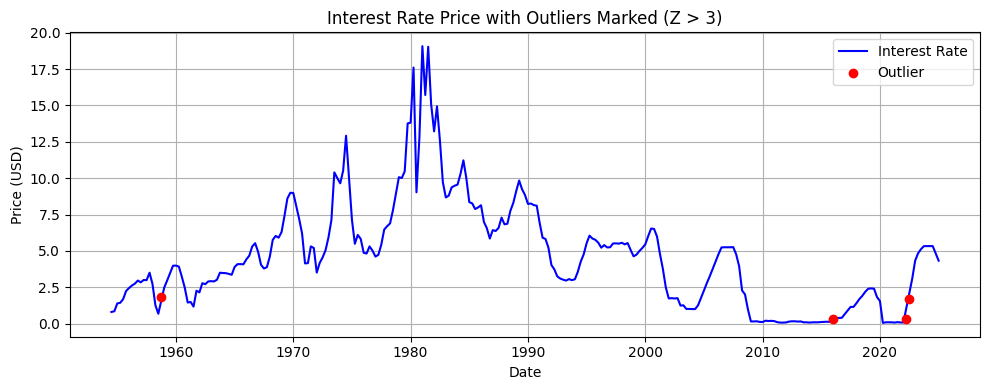

In [ ]:
for col in macro_df_outliers.columns:
    outlier_col = f"{col}_outlier"

    # Skip if outlier column does not exist
    if outlier_col not in macro_df_outliers.columns:
        continue

    plt.figure(figsize=(10, 4))

    # Plot normal values
    mask_normal = ~macro_df_outliers[outlier_col].fillna(False)
    plt.plot(macro_df_outliers.index[mask_normal], macro_df_outliers[col][mask_normal], label=f"{col}", color='blue')

    # Plot outliers in red
    mask_outlier = macro_df_outliers[outlier_col].fillna(False)
    plt.scatter(macro_df_outliers.index[mask_outlier], macro_df_outliers[col][mask_outlier], color='red', label="Outlier", zorder=5)

    plt.title(f"{col} Price with Outliers Marked (Z > 3)")
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()


In [ ]:
import matplotlib.pyplot as plt

def plot_outliers(df, col):
    outlier_col = f"{col}_outlier"

    if outlier_col not in df.columns:
        print(f"Skipping {col}: No outlier column found.")
        return

    plt.figure(figsize=(10, 4))

    # Plot normal data points
    mask_normal = ~df[outlier_col].fillna(False)
    plt.plot(df.index[mask_normal], df[col][mask_normal], label=col, color='blue')

    # Plot outliers in red
    mask_outlier = df[outlier_col].fillna(False)
    plt.scatter(df.index[mask_outlier], df[col][mask_outlier], color='red', label='Outlier', zorder=5)

    plt.title(f"{col} with Outliers Marked (Z > 3)")
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()


Student B

Detected 1 questionable/bad entries removed.


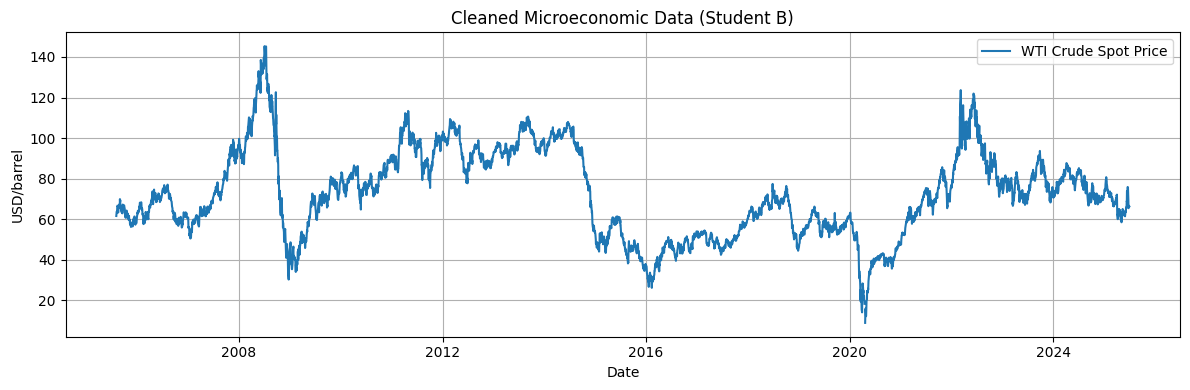

In [ ]:
# Student B: Cleaning "Bad Data" (wrong, questionable, or duplicated entries)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

# ---------------------------
# Step 1: Retrieve Microeconomic Data (EIA Example)
# ---------------------------
api_key = "MM9N71UVCm7kAkJWcpgS9uupY9kaAhdAChMDbk9Q"
series_id = "PET.RWTC.D"  # WTI Crude Spot Price Daily

url = f"http://api.eia.gov/v2/seriesid/{series_id}?api_key={api_key}"
response = requests.get(url).json()
data = response['response']['data']

# Load to DataFrame
micro_df = pd.DataFrame(data, columns=['period', 'value'])
micro_df['period'] = pd.to_datetime(micro_df['period'])
micro_df.set_index('period', inplace=True)
micro_df = micro_df.sort_index()
micro_df.columns = ['WTI_Crude_Spot']

# ---------------------------
# Step 2: Clean “Bad Data”
# ---------------------------

# A. Remove duplicated time entries
duplicates = micro_df.index.duplicated().sum()
micro_df = micro_df[~micro_df.index.duplicated(keep='first')]

# B. Convert invalid types and coerce errors
micro_df['WTI_Crude_Spot'] = pd.to_numeric(micro_df['WTI_Crude_Spot'], errors='coerce')

# C. Remove non-positive or impossible values (e.g., negative oil prices)
bad_values = (micro_df['WTI_Crude_Spot'] < 1) | (micro_df['WTI_Crude_Spot'] > 300)
print(f"Detected {bad_values.sum()} questionable/bad entries removed.")
micro_df.loc[bad_values, 'WTI_Crude_Spot'] = np.nan  # Mark as NaN for Student C to fill

# D. Optional: Visual Inspection of questionable data
plt.figure(figsize=(12, 4))
plt.plot(micro_df, label="WTI Crude Spot Price")
plt.title("Cleaned Microeconomic Data (Student B)")
plt.ylabel("USD/barrel")
plt.xlabel("Date")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("studentB_cleaned_micro_plot.png")
plt.show()

# ---------------------------
# Step 3: Save Cleaned Data
# ---------------------------
micro_df.to_csv("studentB_cleaned_micro_data.csv")


Student C

/tmp/ipython-input-41-889626684.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  fin_df = yf.download(tickers, start="2020-01-01", end="2025-01-01")['Close']
[*********************100%***********************]  5 of 5 completed


Missing values per column (before cleaning):
 Ticker
CL=F    0
CVX     0
USO     0
XLE     0
XOM     0
dtype: int64

Missing values per column (after cleaning):
 Ticker
CL=F    0
CVX     0
USO     0
XLE     0
XOM     0
dtype: int64


<Figure size 1200x500 with 0 Axes>

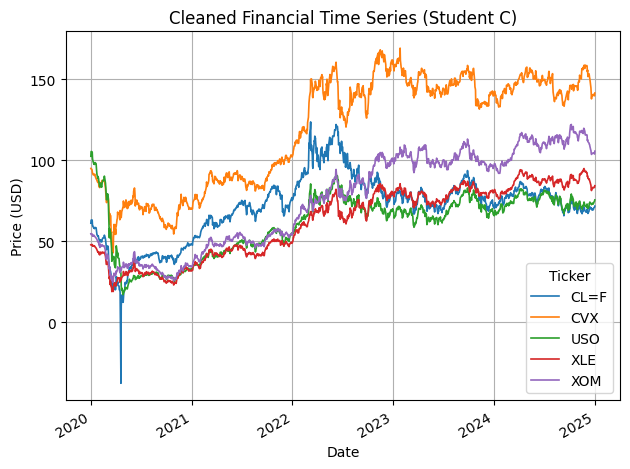

In [ ]:
# Student C: Cleaning Missing Values (Imputation)

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# Step 1: Download Financial Data
# ---------------------------
tickers = ['CL=F', 'USO', 'XLE', 'XOM', 'CVX']  # Crude oil, oil ETF, energy ETF, Exxon, Chevron

fin_df = yf.download(tickers, start="2020-01-01", end="2025-01-01")['Close']
fin_df.to_csv("raw_financial_data.csv")  # Save raw data before cleaning

# ---------------------------
# Step 2: Check Missing Values
# ---------------------------
missing_report = fin_df.isna().sum()
print("Missing values per column (before cleaning):\n", missing_report)

# ---------------------------
# Step 3: Impute Missing Values
# ---------------------------
# Strategy: Forward fill → Backward fill → Interpolation for any residual NaNs

# Forward fill (propagates last valid value)
fin_df_ffill = fin_df.ffill()

# Backward fill (fills remaining holes from the front)
fin_df_bfill = fin_df_ffill.bfill()

# Linear interpolation for any leftover NaNs (rare)
fin_df_cleaned = fin_df_bfill.interpolate(method='linear', limit_direction='both')

# Confirm all missing values handled
print("\nMissing values per column (after cleaning):\n", fin_df_cleaned.isna().sum())

# ---------------------------
# Step 4: Save & Plot Cleaned Financial Data
# ---------------------------
fin_df_cleaned.to_csv("studentC_cleaned_financial_data.csv")

plt.figure(figsize=(12, 5))
fin_df_cleaned.plot(title="Cleaned Financial Time Series (Student C)", linewidth=1.2)
plt.ylabel("Price (USD)")
plt.grid(True)
plt.tight_layout()
plt.savefig("studentC_cleaned_financial_plot.png")
plt.show()


**Step 6**

<Figure size 1400x600 with 0 Axes>

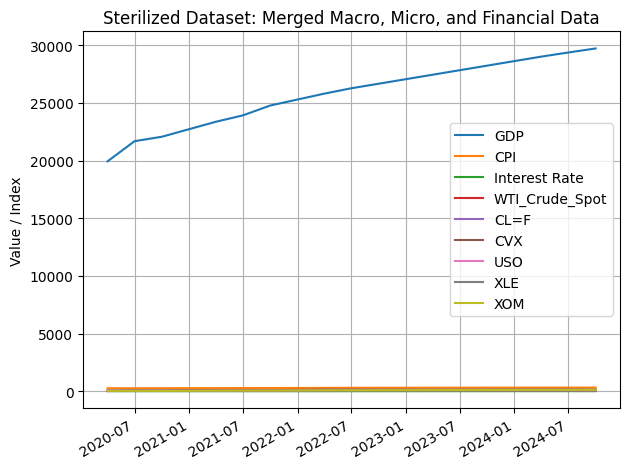


=== Sterilization Summary ===
Total rows before final merge: 11
Rows dropped due to missing or inconsistent timestamps: 0
Final sterilized dataset rows: 11

Cleaning Explanation:
- Student A handled extreme outliers using IQR or Z-score filtering techniques.
- Student B removed duplicated timestamps and values that fell outside plausible physical or economic limits.
- Student C handled missing values with forward-fill and interpolation to ensure continuity.
- Only periods with complete and reliable macro, micro, and financial indicators were kept.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------------
# Load Cleaned Data from Each Student
# ---------------------------
macro_df = pd.read_csv("macro_df_outliers.csv", index_col=0, parse_dates=True)         # Student A
micro_df = pd.read_csv("studentB_cleaned_micro_data.csv", index_col=0, parse_dates=True) # Student B
fin_df = pd.read_csv("studentC_cleaned_financial_data.csv", index_col=0, parse_dates=True) # Student C

# ---------------------------
# Merge Datasets on Date Index
# ---------------------------
combined_df = macro_df.join([micro_df, fin_df], how='inner')

# ---------------------------
# Final Cleaning: Drop any remaining NaNs
# ---------------------------
before_rows = combined_df.shape[0]
combined_df.dropna(inplace=True)
after_rows = combined_df.shape[0]
dropped_rows = before_rows - after_rows

# ---------------------------
# Save and Visualize Final "Sterilized" Dataset
# ---------------------------
combined_df.to_csv("sterilized_oil_model_data.csv")

plt.figure(figsize=(14, 6))
combined_df.plot(title="Sterilized Dataset: Merged Macro, Micro, and Financial Data")
plt.ylabel("Value / Index")
plt.grid(True)
plt.tight_layout()
plt.savefig("sterilized_dataset_plot.png")
plt.show()

# ---------------------------
# Summary Explanation (Prints for Group Report)
# ---------------------------
print("\n=== Sterilization Summary ===")
print(f"Total rows before final merge: {before_rows}")
print(f"Rows dropped due to missing or inconsistent timestamps: {dropped_rows}")
print(f"Final sterilized dataset rows: {after_rows}")
print("\nCleaning Explanation:")
print("- Student A handled extreme outliers using IQR or Z-score filtering techniques.")
print("- Student B removed duplicated timestamps and values that fell outside plausible physical or economic limits.")
print("- Student C handled missing values with forward-fill and interpolation to ensure continuity.")
print("- Only periods with complete and reliable macro, micro, and financial indicators were kept.")


**Step 7**

Student A

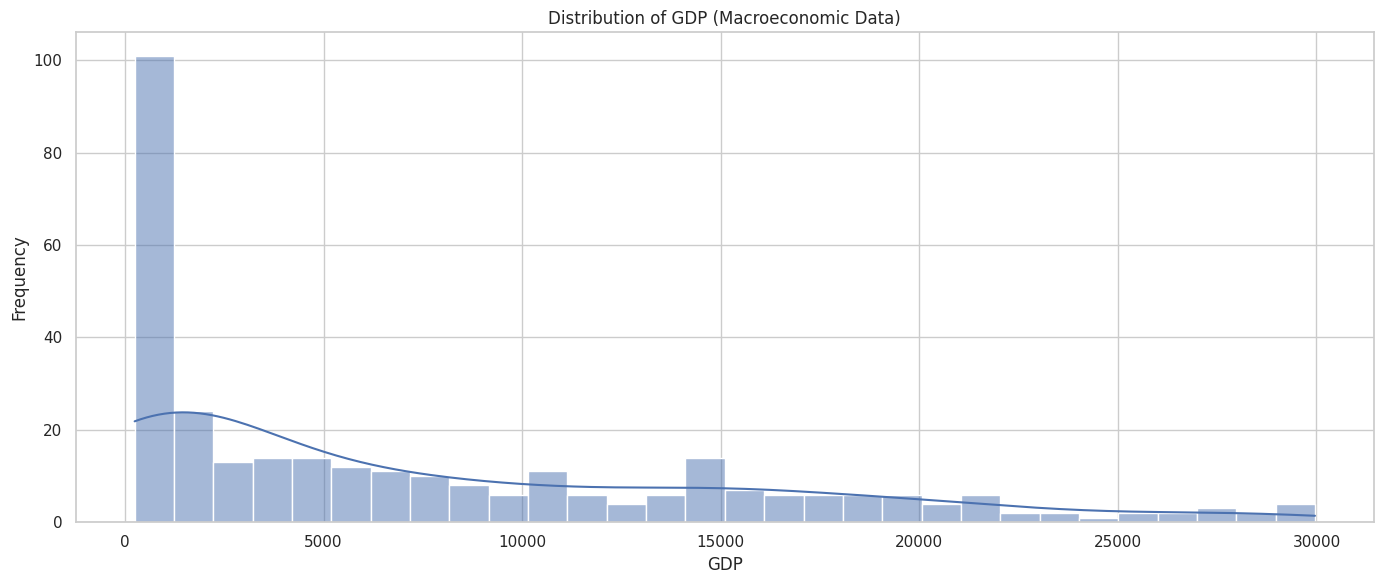

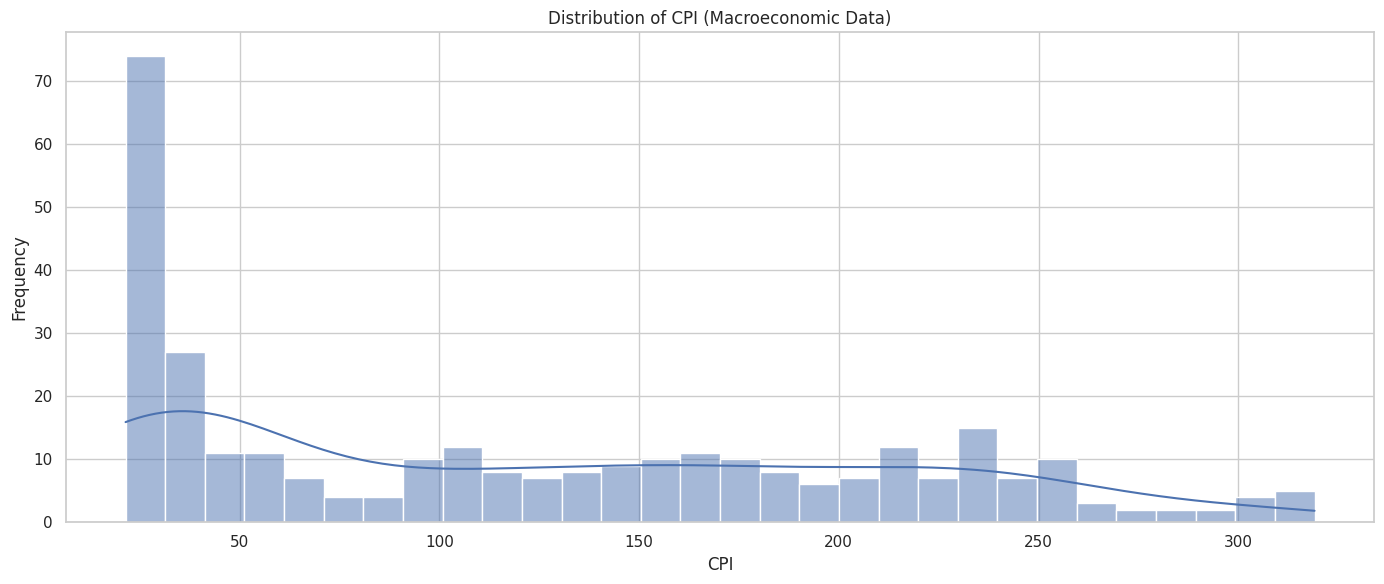

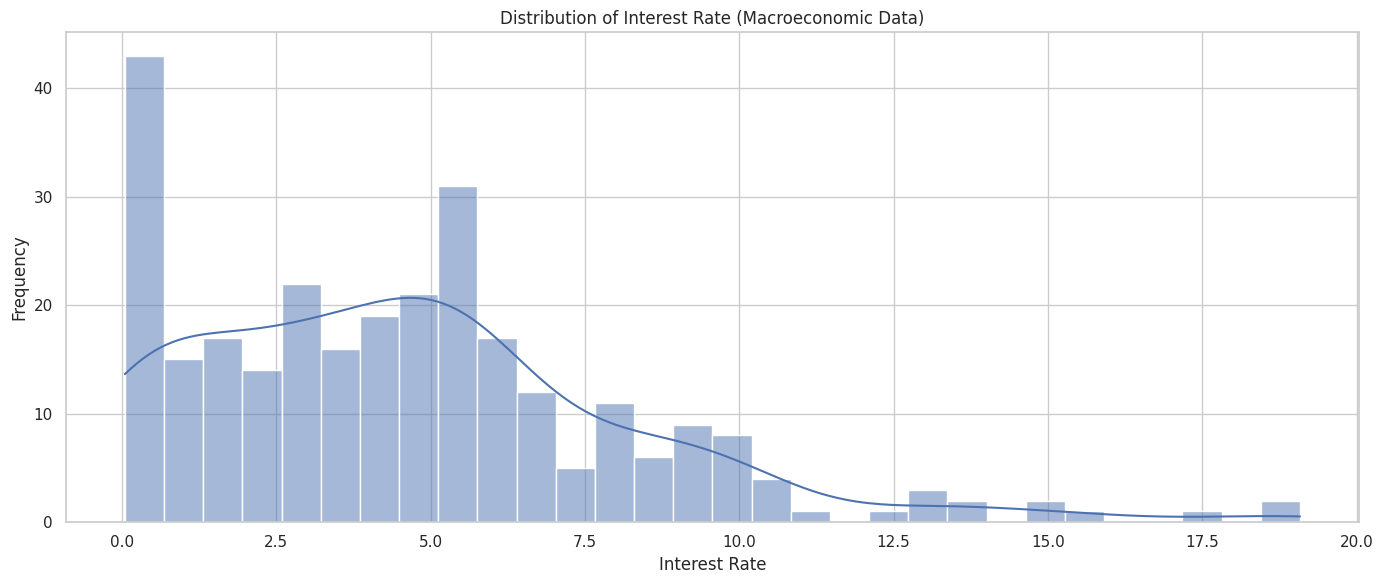

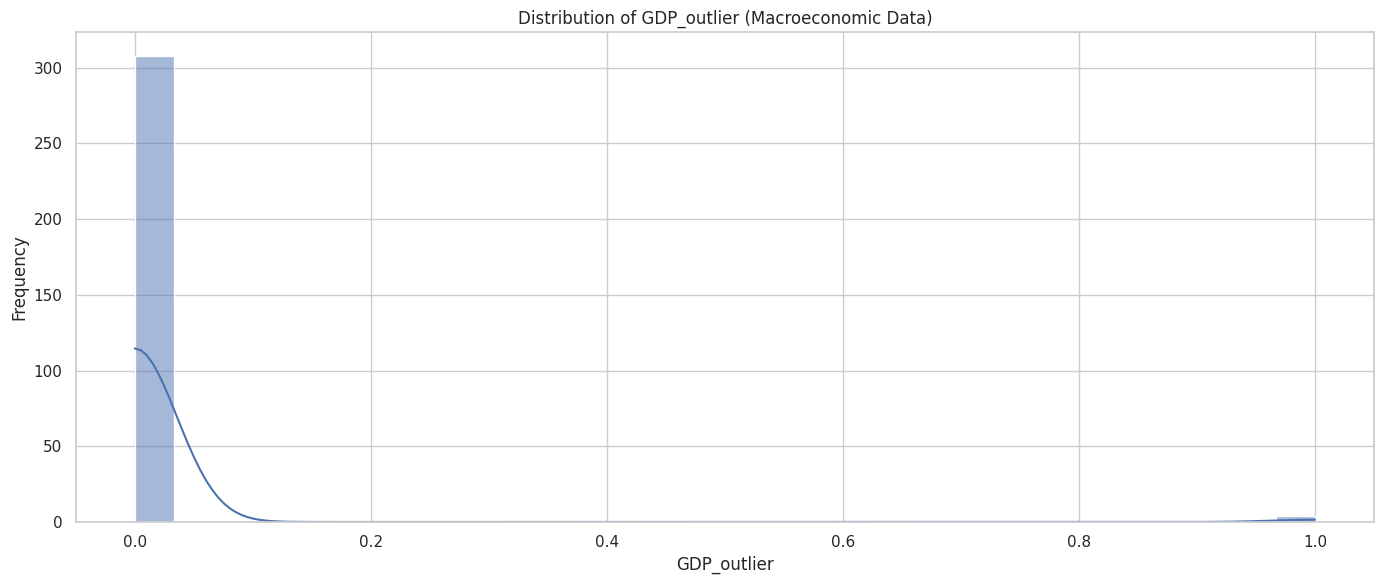

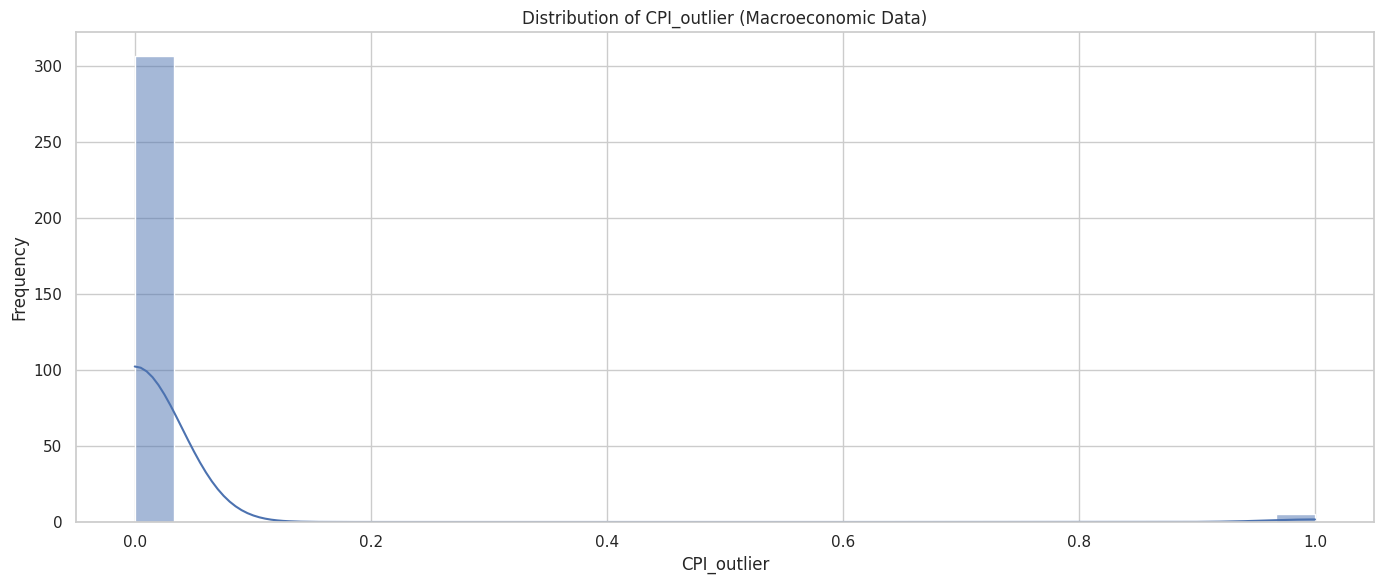

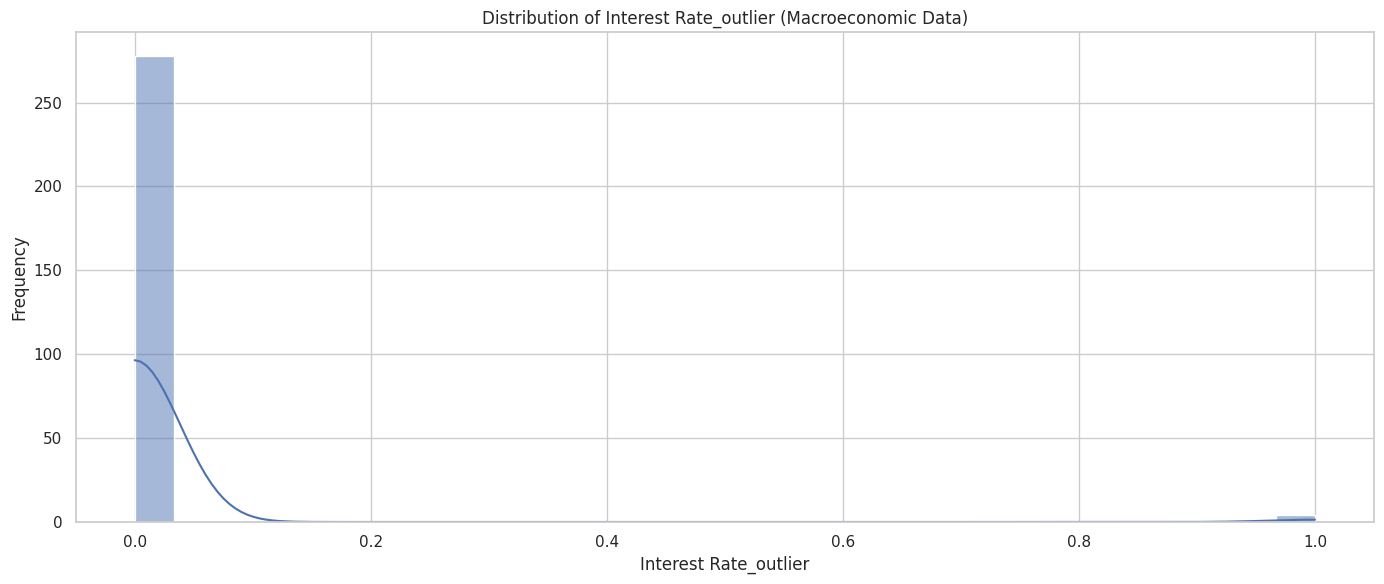

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data from all students
macro_df = pd.read_csv("macro_df_outliers.csv", index_col=0, parse_dates=True)
micro_df = pd.read_csv("studentB_cleaned_micro_data.csv", index_col=0, parse_dates=True)
fin_df = pd.read_csv("studentC_cleaned_financial_data.csv", index_col=0, parse_dates=True)

# Set plotting style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (14, 6)

# -------------------------------
# Student A: Distributional Plots
# -------------------------------
for column in macro_df.columns:
    plt.figure()
    sns.histplot(macro_df[column].dropna(), kde=True, bins=30)
    plt.title(f"Distribution of {column} (Macroeconomic Data)")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()
    plt.savefig(f"studentA_distribution_{column}.png")
    plt.close()



Student B

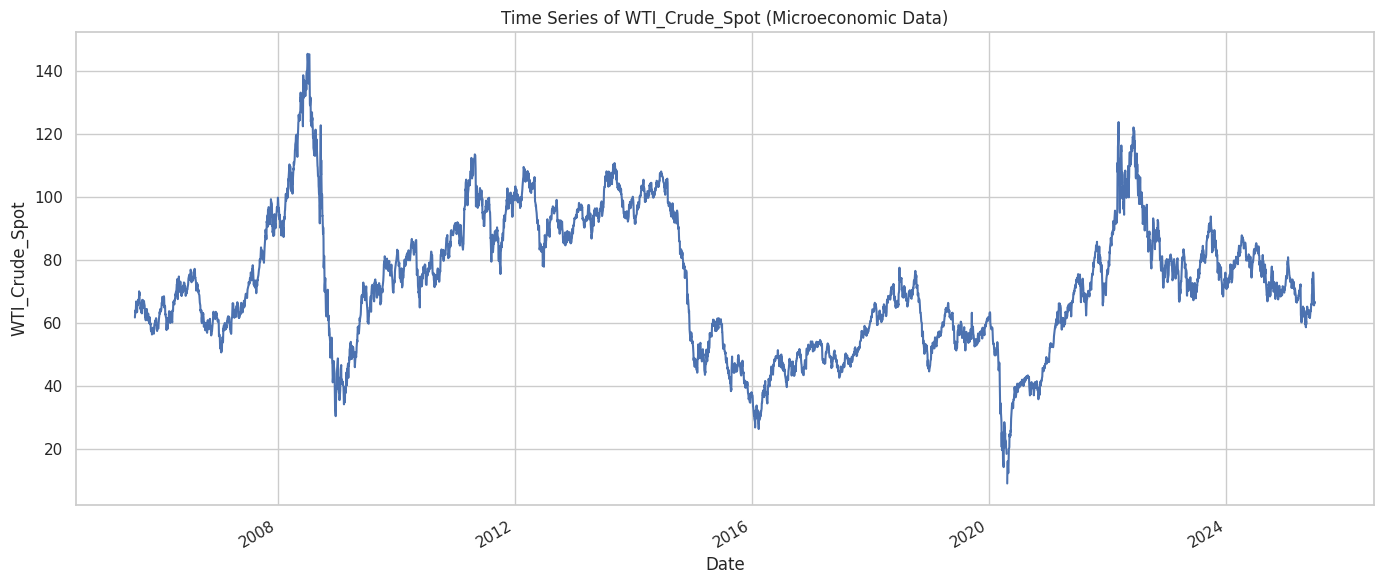

In [ ]:
for column in micro_df.columns:
    plt.figure()
    micro_df[column].plot(title=f"Time Series of {column} (Microeconomic Data)", grid=True)
    plt.xlabel("Date")
    plt.ylabel(column)
    plt.tight_layout()
    plt.show()
    plt.savefig(f"studentB_timeseries_{column}.png")
    plt.close()

Student C

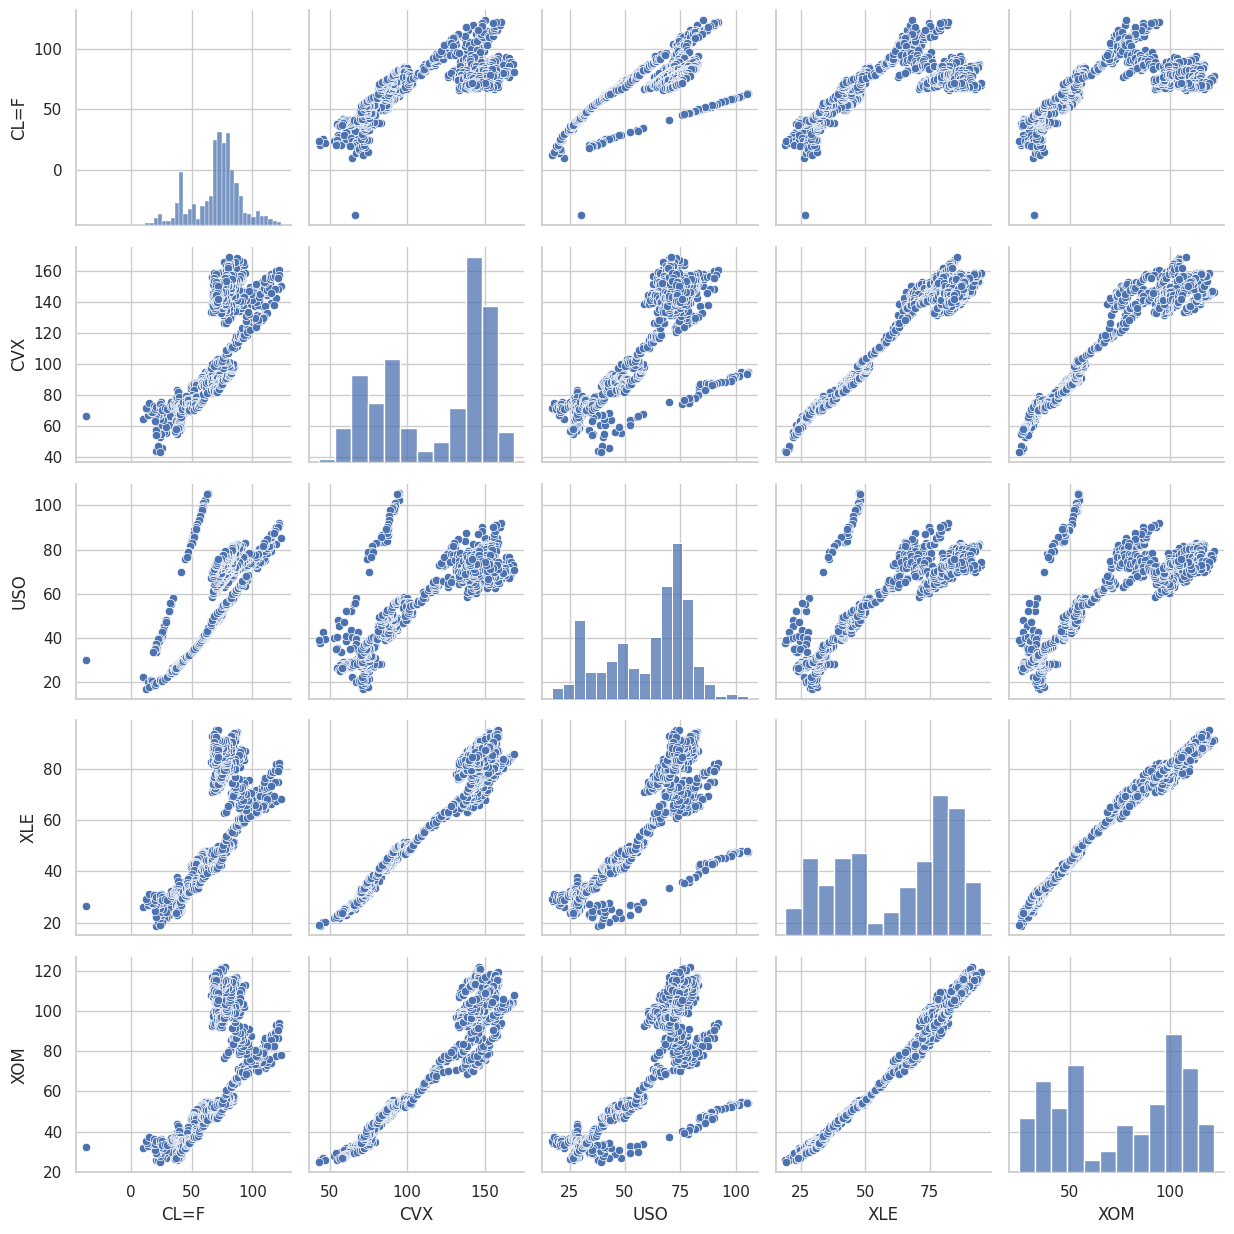

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(fin_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Financial Data)")
plt.tight_layout()
plt.savefig("studentC_correlation_matrix.png")
plt.close()

# Pairplot for selected variables (first 5 if too many)
pairplot_df = fin_df.dropna().iloc[:, :5]
sns.pairplot(pairplot_df)
plt.tight_layout()
plt.show()
plt.savefig("studentC_pairplot.png")
plt.close()

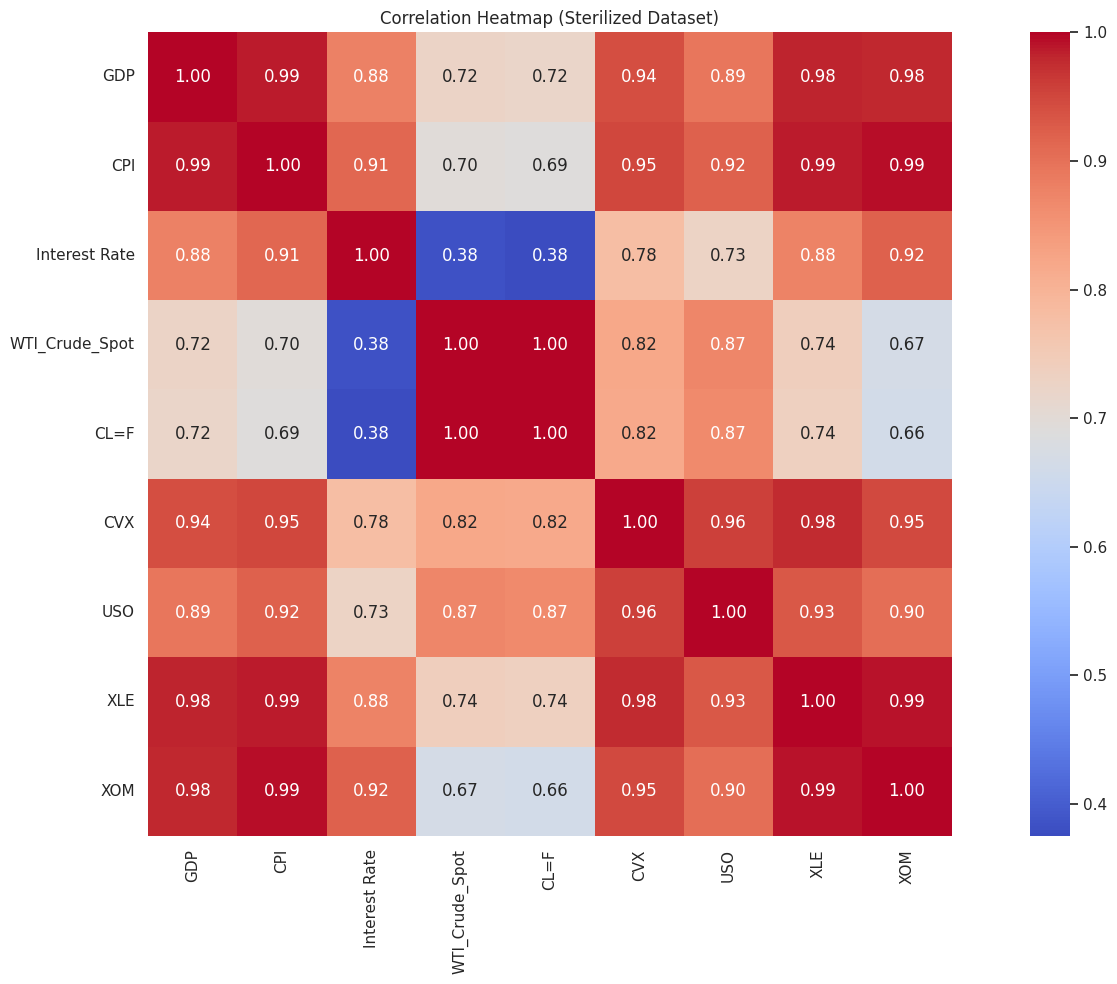

<Figure size 1200x600 with 0 Axes>

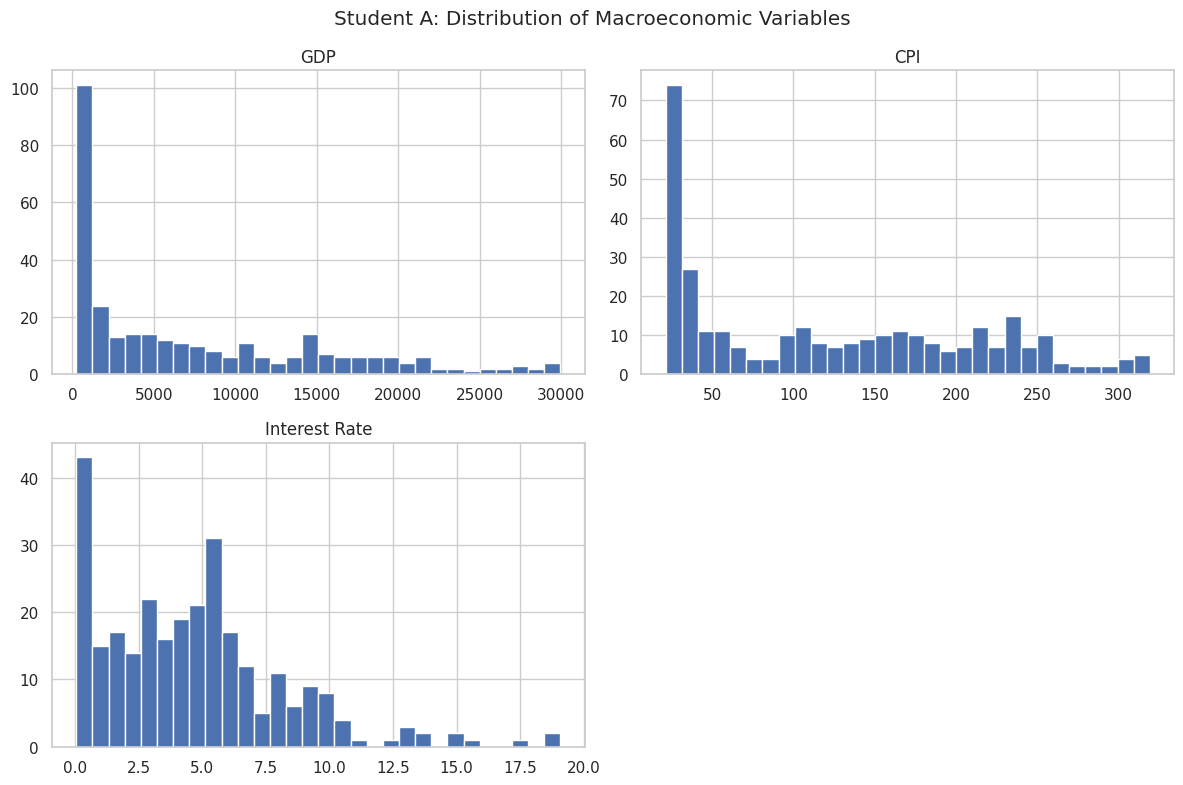

<Figure size 1400x600 with 0 Axes>

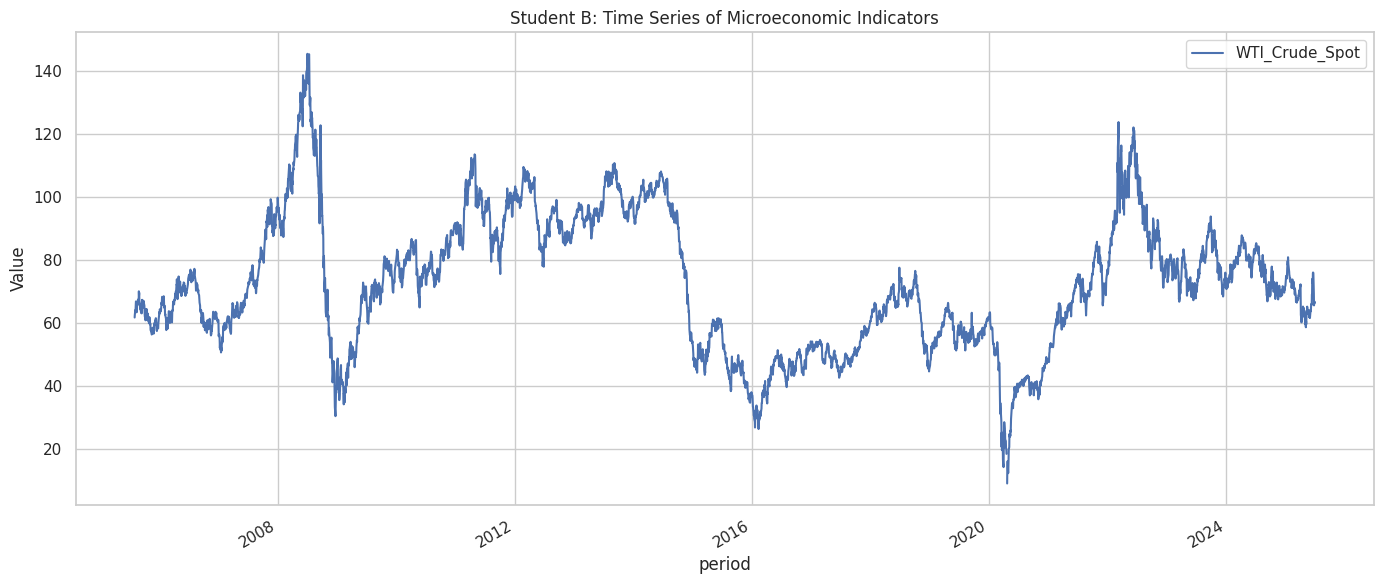

<Figure size 1400x600 with 0 Axes>

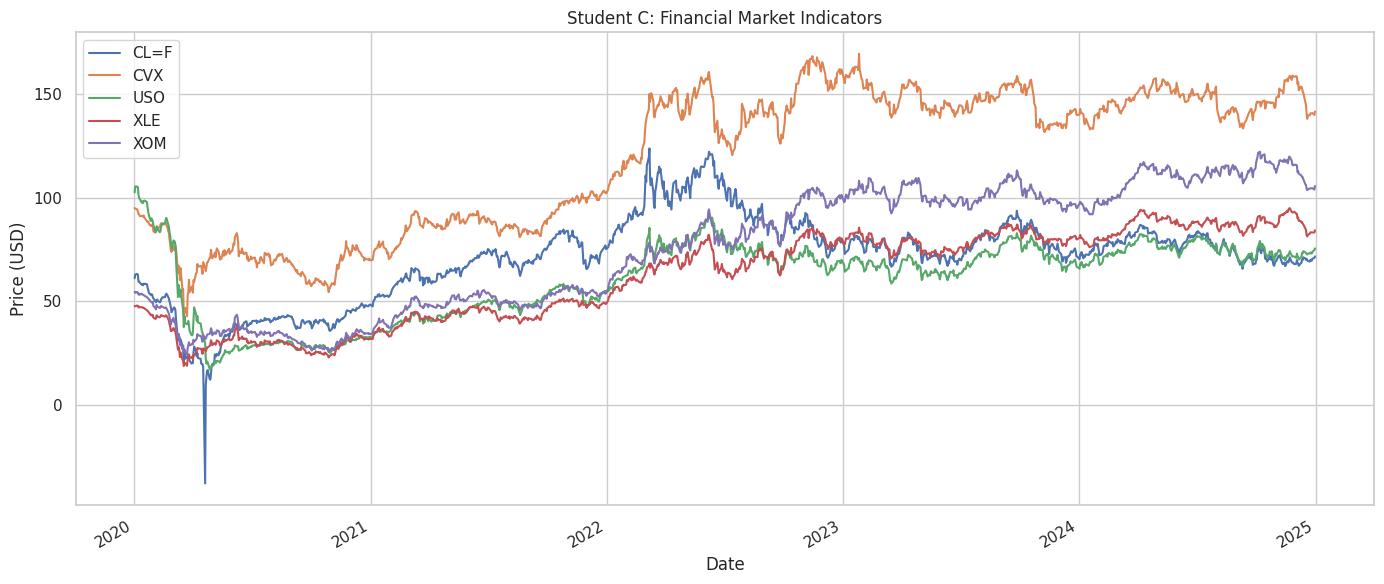

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Cleaned Data from Each Student
macro_df = pd.read_csv("macro_df_outliers.csv", index_col=0, parse_dates=True)  # Student A
micro_df = pd.read_csv("studentB_cleaned_micro_data.csv", index_col=0, parse_dates=True)  # Student B
fin_df = pd.read_csv("studentC_cleaned_financial_data.csv", index_col=0, parse_dates=True)  # Student C

# Align all datasets to common dates (inner join)
combined_df = macro_df.join([micro_df, fin_df], how='inner')

# Drop non-numeric columns if any (e.g., 'outlier' flags)
combined_df = combined_df.select_dtypes(include=['float64', 'int64'])

# Save sterilized version of the data
combined_df.to_csv("sterilized_combined_data.csv")

# -------------------------------
# Correlation Heatmap
# -------------------------------
plt.figure(figsize=(16, 10))
corr = combined_df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap (Sterilized Dataset)")
plt.tight_layout()
plt.savefig("correlation_heatmap.png")
plt.show()

# -------------------------------
# Student A: Distribution Plot
# -------------------------------
plt.figure(figsize=(12, 6))
macro_df.hist(bins=30, figsize=(12, 8), layout=(2, 2))
plt.suptitle("Student A: Distribution of Macroeconomic Variables")
plt.tight_layout()
plt.savefig("studentA_distribution.png")
plt.show()

# -------------------------------
# Student B: Time Series Plot
# -------------------------------
plt.figure(figsize=(14, 6))
micro_df.plot(title="Student B: Time Series of Microeconomic Indicators")
plt.ylabel("Value")
plt.grid(True)
plt.tight_layout()
plt.savefig("studentB_timeseries.png")
plt.show()

# -------------------------------
# Student C: Multivariate Line Plot
# -------------------------------
plt.figure(figsize=(14, 6))
fin_df.plot(title="Student C: Financial Market Indicators")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.tight_layout()
plt.savefig("studentC_multivariate.png")
plt.show()


## Step 10


**Algorithm 1: Inferred Causality with Markov Blankets**

**Input:** Dataset $D$ consisting of variables $V$

**Output:** Inferred causal structure represented as graph $G$

1. **Initialize** graph $G$ with nodes corresponding to each variable in $V$, initially without edges.

2. **For** each variable $X_i \in V$:
    - Identify the Markov blanket $MB(X_i)$ using conditional independence tests on dataset $D$.

3. **For** each variable $X_i \in V$:
    - **For** each variable $X_j \in MB(X_i)$:
        - Add an undirected edge between $X_i$ and $X_j$ in $G$ if it does not already exist.

4. **Orient edges** to identify colliders:
    - **For** each triplet $(X_i, X_j, X_k)$ in $G$:
        - If $X_i$ and $X_k$ are both in $MB(X_j)$ but not directly connected by an edge, orient edges as collider: $X_i \rightarrow X_j \leftarrow X_k$.

5. **Further orient edges** according to the following rules:
    - **For** each pair $(X_i, X_j)$:
        - If a directed path exists from $X_i$ to $X_j$ consistent with conditional independence constraints, orient the edge accordingly to avoid cycles or conflicts.

6. **Repeat** Step 5 until no additional orientations are possible.

7. **Return** the resulting graph $G$ representing the inferred causal structure.
